k-center greedy algorithm

In [20]:
import networkx as nx
import itertools
from datetime import datetime

import matplotlib.pyplot as plt
import networkx as nx
from timeit import default_timer

import sys

In [21]:
# Compute the objective value of the solution 'centers'
def k_centers_objective_value(G, centers):
    d = nx.multi_source_dijkstra_path_length(G, centers, weight = 'weight')
    value = max(d.values())
    return value

In [22]:
def k_centers_brute_force(G, k, time_limit):
    start = default_timer()
    optimal_solution_found = True
    setofcenters = set(G.nodes())
    best_centers = tuple()
    best_value = float('inf')
    comb = itertools.combinations(setofcenters, k)
    for subset in comb:
        dist = k_centers_objective_value(G, subset)
        if dist < best_value:
            best_value = dist
            best_centers = subset
        duration = default_timer() - start
        # print(f'{duration=}')
        if duration > time_limit:
            # print(f'Time limit exceeded: {time_limit} sec. Exiting ...')
            optimal_solution_found = False
            break

    return best_value, best_centers, optimal_solution_found

In [23]:
# Computer solutions for k=3
k = 3
timelimit = 5
G = nx.read_gexf('graph_0005_07481.gexf', node_type=int)
optVal, optCenters, found = k_centers_brute_force(G, k=k,time_limit = timelimit)
print(optVal, optCenters, found)


80.0 (0, 1, 3) True


In [24]:
# Measure the run-times with respect to increasing graph size
file_names = ['graph_0005_07481.gexf', 'graph_0010_07481.gexf', 'graph_0020_07481.gexf', 'graph_0050_07481.gexf']
graph_sizes = []
execution_times = []
k = 3
timelimit = 5
for fname in file_names:
    print('Graph: ' + fname)
    G = nx.read_gexf(fname, node_type=int)
    start = default_timer()
    optVal, optCenters, found = k_centers_brute_force(G, k=k,time_limit = timelimit)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)

Graph: graph_0005_07481.gexf
Execution time:  0.0018442999999024323
Graph: graph_0010_07481.gexf
Execution time:  0.015843499999846244
Graph: graph_0020_07481.gexf
Execution time:  0.45415330000014364
Graph: graph_0050_07481.gexf
Execution time:  5.041298200000256


graph_sizes=[5, 10, 20, 50]
execution_times=[0.3503435999996327, 3.9516726000001654, 31.495431700000154, 100.00054890000001]


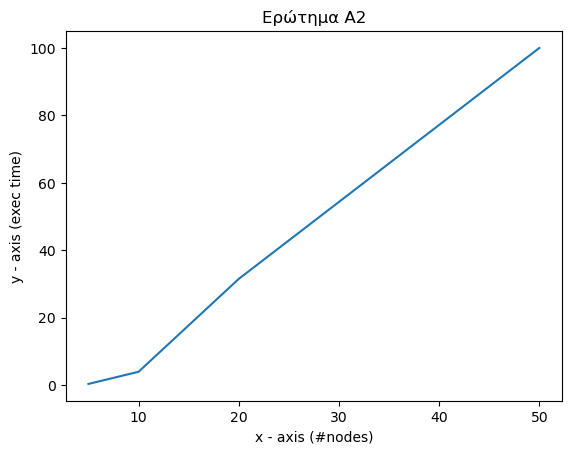

In [50]:
# Plot the measurements
import matplotlib.pyplot as plt

print(f'{graph_sizes=}')
print(f'{execution_times=}')

# For example:
graph_sizes=[5, 10, 20, 50]
#execution_times=[0.005022226999983559, 0.0020558059999871148, 0.0027476030000457285, 0.005172576999996181]

# plotting the points
plt.plot(graph_sizes, execution_times)

# naming the x axis
plt.xlabel('x - axis (#nodes)')
# naming the y axis
plt.ylabel('y - axis (exec time)')

# giving a title to my graph
plt.title('Ερώτημα A2')

# function to show the plot
plt.show()

k =  2
Execution time:  0.3503435999996327
k =  3
Execution time:  3.9516726000001654
k =  4
Execution time:  31.495431700000154
k =  5
Execution time:  100.00054890000001


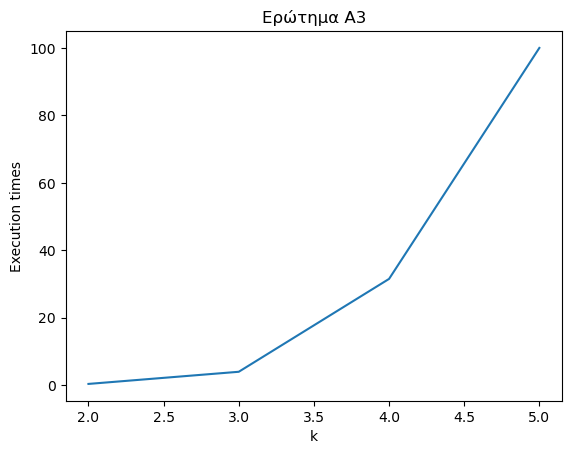

In [49]:
G = nx.read_gexf('graph_0030_07481.gexf', node_type=int)
execution_times = []
timelimit = 100
for k in range(2, 6):
    print('k =  ' + str(k))
    start = default_timer()
    optVal, optCenters, found = k_centers_brute_force(G, k=k,time_limit = timelimit)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)

# Γραφική παράσταση
k_list = [2, 3, 4, 5]
plt.xlabel('k')
plt.ylabel('Execution times')
plt.title('Ερώτημα Α3')
plt.plot(k_list, execution_times)
plt.show()

In [28]:
# Greedy algorithm for the k-centers problem
# Kleinberg & Tardos, Algorithm Design, Section 11.2

import random
import operator


def k_centers_greedy(G, k, first_center=None):
    centers = []
    if first_center is None:
        length_center = len(G) - 1
        first_center = random.randint(0, length_center)
    centers.append(first_center)
    index = None
    while len(centers) < k:
        max_distance_from_center = 0
        if len(centers) > 1:
            for node in G.nodes():
                distance_from_center = list()
                for center in centers:
                    if node == center:
                        distance_from_center.append(0)
                    else:
                        distance_from_center.append(int(G[node][center]['weight']))
                min_dist = min(distance_from_center)
                if min_dist > max_distance_from_center:
                    max_distance_from_center = min_dist
                    index = node
        else:
            max_weight = 0
            for node in G.nodes():
                if node not in centers:
                    if G[node][centers[0]]['weight'] > max_weight:
                        max_weight = G[node][first_center]['weight']
                        index = node
        centers.append(index)
    cost = k_centers_objective_value(G, centers)
    return cost, centers

Graph: graph_0005_07481.gexf
Execution time:  0.00014950000013413955
Graph: graph_0010_07481.gexf
Execution time:  0.0003172000001541164
Graph: graph_0020_07481.gexf
Execution time:  0.0005965000000287546
Graph: graph_0050_07481.gexf
Execution time:  0.0029494000000340748


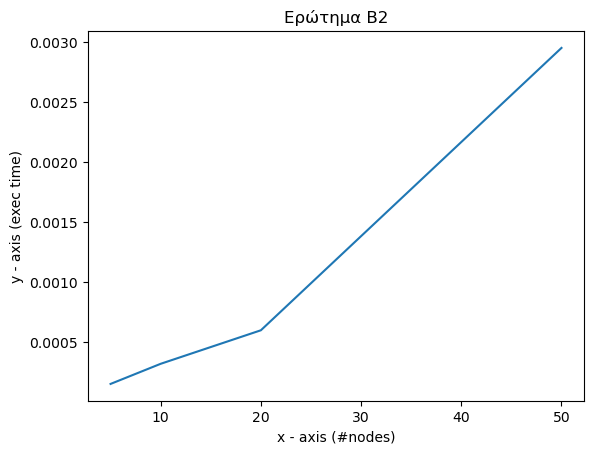

In [47]:
# Measure the run-times with respect to increasing graph size
file_names = ['graph_0005_07481.gexf', 'graph_0010_07481.gexf', 'graph_0020_07481.gexf', 'graph_0050_07481.gexf']
graph_sizes = [5, 10, 20, 50]
execution_times = []
k = 3
timelimit = 5
for fname in file_names:
    print('Graph: ' + fname)
    G = nx.read_gexf(fname, node_type=int)
    start = default_timer()
    k_centers_greedy(G, k = k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)
graph_sizes=[5, 10, 20, 50]
# plotting the points
plt.plot(graph_sizes, execution_times)
# naming the x axis
plt.xlabel('x - axis (#nodes)')
# naming the y axis
plt.ylabel('y - axis (exec time)')
# giving a title to my graph
plt.title('Ερώτημα B2')
# function to show the plot
plt.show()

In [41]:
# Computer solutions for k=3
k = 3
centers = []
cost, centers = k_centers_greedy(G, k=k, first_center=5)
print(cost, centers)
cost, centers = k_centers_greedy(G, k=k, first_center=8)
print(cost, centers)

558.0 [5, 10, 16]
602.0 [8, 26, 10]


In [45]:
# Computer solutions for k=3 and k=4
G = nx.read_gexf('graph_0050_07481.gexf', node_type=int)
cost, centers = k_centers_greedy(G, 3, first_center=5)
print(cost, centers)
cost, centers = k_centers_greedy(G, 3, first_center=8)
print(cost, centers)
cost, centers = k_centers_greedy(G, 4, first_center=5)
print(cost, centers)
cost, centers = k_centers_greedy(G, 4, first_center=8)
print(cost, centers)

808.0 [5, 27, 2]
820.0 [8, 2, 27]
790.0 [5, 27, 2, 33]
790.0 [8, 2, 27, 26]


k =  2
Execution time:  0.0009743999999045627
k =  3
Execution time:  0.0010400000001027365
k =  4
Execution time:  0.0011601000001064676
k =  5
Execution time:  0.0013733000000684115


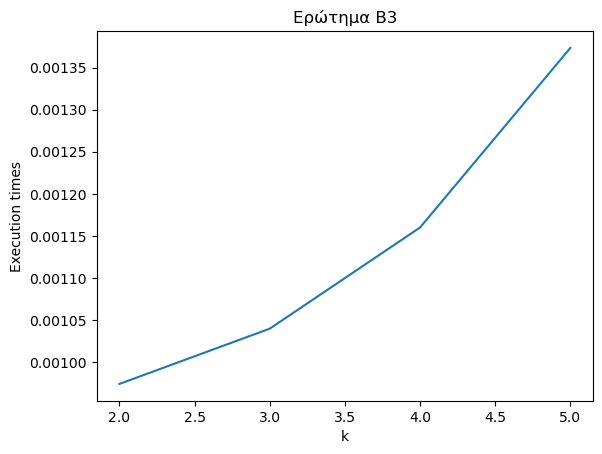

In [51]:
# Measure the run-times with respect to increasing k values
fname = 'graph_0030_07481.gexf'
G = nx.read_gexf(fname, node_type=int)
k_values = [2, 3, 4, 5]
execution_times = []

for k in k_values:
    centers = []
    print('k =  ' + str(k))
    start = default_timer()
    cost, centers = k_centers_greedy(G, k=k)
    end = default_timer()
    execution_time = end - start
    execution_times.append(execution_time)
    print('Execution time: ', execution_time)

plt.xlabel('k')
plt.ylabel('Execution times')
plt.title('Ερώτημα B3')
plt.plot(k_values, execution_times)
plt.show()